In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [7]:
df = pd.read_csv("/content/forestfires.csv")
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [8]:
df.describe

<bound method NDFrame.describe of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
#missing value
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
#duplicate values
df[df.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [12]:
df[df.duplicated()].shape

(8, 31)

In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
print('number of numerical variables', len(numerical_features))

number of numerical variables 28


In [14]:
#visualize numerical variables
df[numerical_features].head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthdec  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0  

[5 rows x 28 columns]

**discrete feature**

In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


**continuous variable**

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


**categorical variables**

In [17]:
cat = [var for var in df.columns if df[var].dtype=='O']
print('there are {} categorical variables\n'.format(len(cat)))
print('the categorical variables are :\n\n', cat)

there are 3 categorical variables

the categorical variables are :

 ['month', 'day', 'size_category']


**Frequency counts of categorical variables**

In [18]:
# view frequency counts of values in categorical variables

for var in cat:

    print(df[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [19]:
# view frequency distribution of categorical variables

for var in cat:

    print(df[var].value_counts()/np.float(len(df)))


aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


<ipython-input-19-95ae2e048224>:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-19-95ae2e048224>:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-19-95ae2e048224>:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will 

**cardinality**

In [20]:
# check for cardinality in categorical variables

for var in cat:

    print(var, ' contains ', len(df[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.028485  0.056702  0.040122  0.019306  ... -0.137044 -0.281535   
DMC      -0.105342  0.074790  0.072994 -0.012010  ... -0.176301 -0.317899   
DC       -0.203466  0.035861  0.049383 -0.004220  ... -0.105642 -0.399277   
ISI       0.106826  0.067668  0.008258  0.046695  ... -0.162322 -0.249777   
temp     -0.227116  0.069491  0.097844 -0.071949  ... -0.329648 -0.320015   
RH        0.069410  0.099751 -0.075519  0.064506  ... -0.047714  0.140430   
wind      1.000000  0.061119  0.012317  0.118090  ...  0.269702 -0.029431   
rain      0.061119  1.000000 -0.007366 -0.004261  ... -0.009752 -0.014698   
area      0.012317 -0.007366  1.000000 -0.052911  ...  0.001010 -0.020732   
dayfri    0.118090 -0.004261 -0.052911  1.000000  ... -0.019140  0.046323   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  ...  0.114519  0.003933   
daysat   -0.063799 -0.032271  0.087868 -0.195372  ... -0.058625  0.020406   
daysun    0.027981 -0.017872 -0.020463 -0.210462  ... -0.024966  0.008416   
daythu   -0.062553 -0.026798  0.020121 -0.162237  ... -0.002838 -0.042278   
daytue    0.053396  0.139311 -0.001333 -0.166728  ... -0.005125 -0.014491   
daywed   -0.019965 -0.020744 -0.011452 -0.151487  ...  0.002899 -0.035713   
monthapr  0.048266 -0.009752 -0.008280 -0.019140  ... -0.017717 -0.026701   
monthaug  0.028577  0.093101 -0.004187 -0.100837  ... -0.098941 -0.149116   
monthdec  0.269702 -0.009752  0.001010 -0.019140  ...  1.000000 -0.026701   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  ... -0.026701  1.000000   
monthjan -0.070245 -0.004566 -0.012589 -0.027643  ... -0.008295 -0.012501   
monthjul -0.040645 -0.013390  0.006149 -0.048969  ... -0.034190 -0.051528   
monthjun  0.012124 -0.013510 -0.020314  0.006000  ... -0.024543 -0.036989   
monthmar  0.181433 -0.020744 -0.045596  0.036205  ... -0.045456 -0.068508   


**data visualization**

<ipython-input-22-d873656487dc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

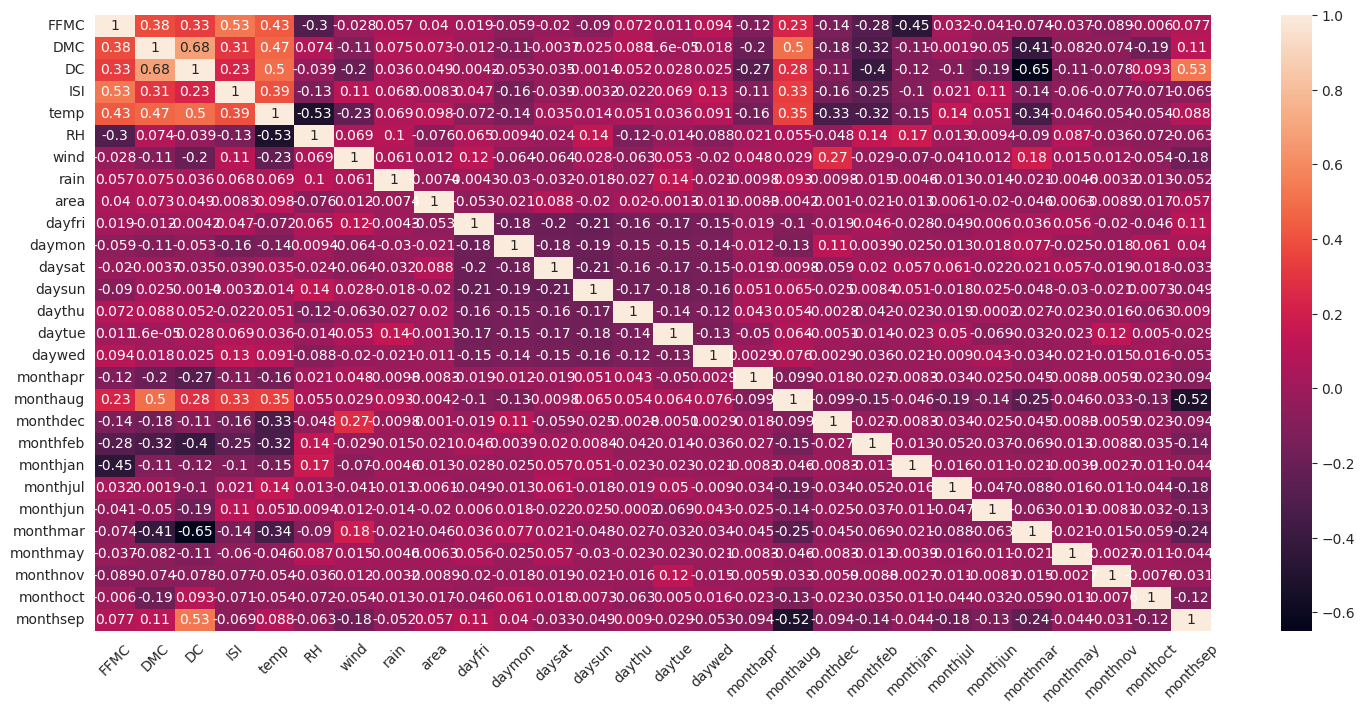

In [22]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

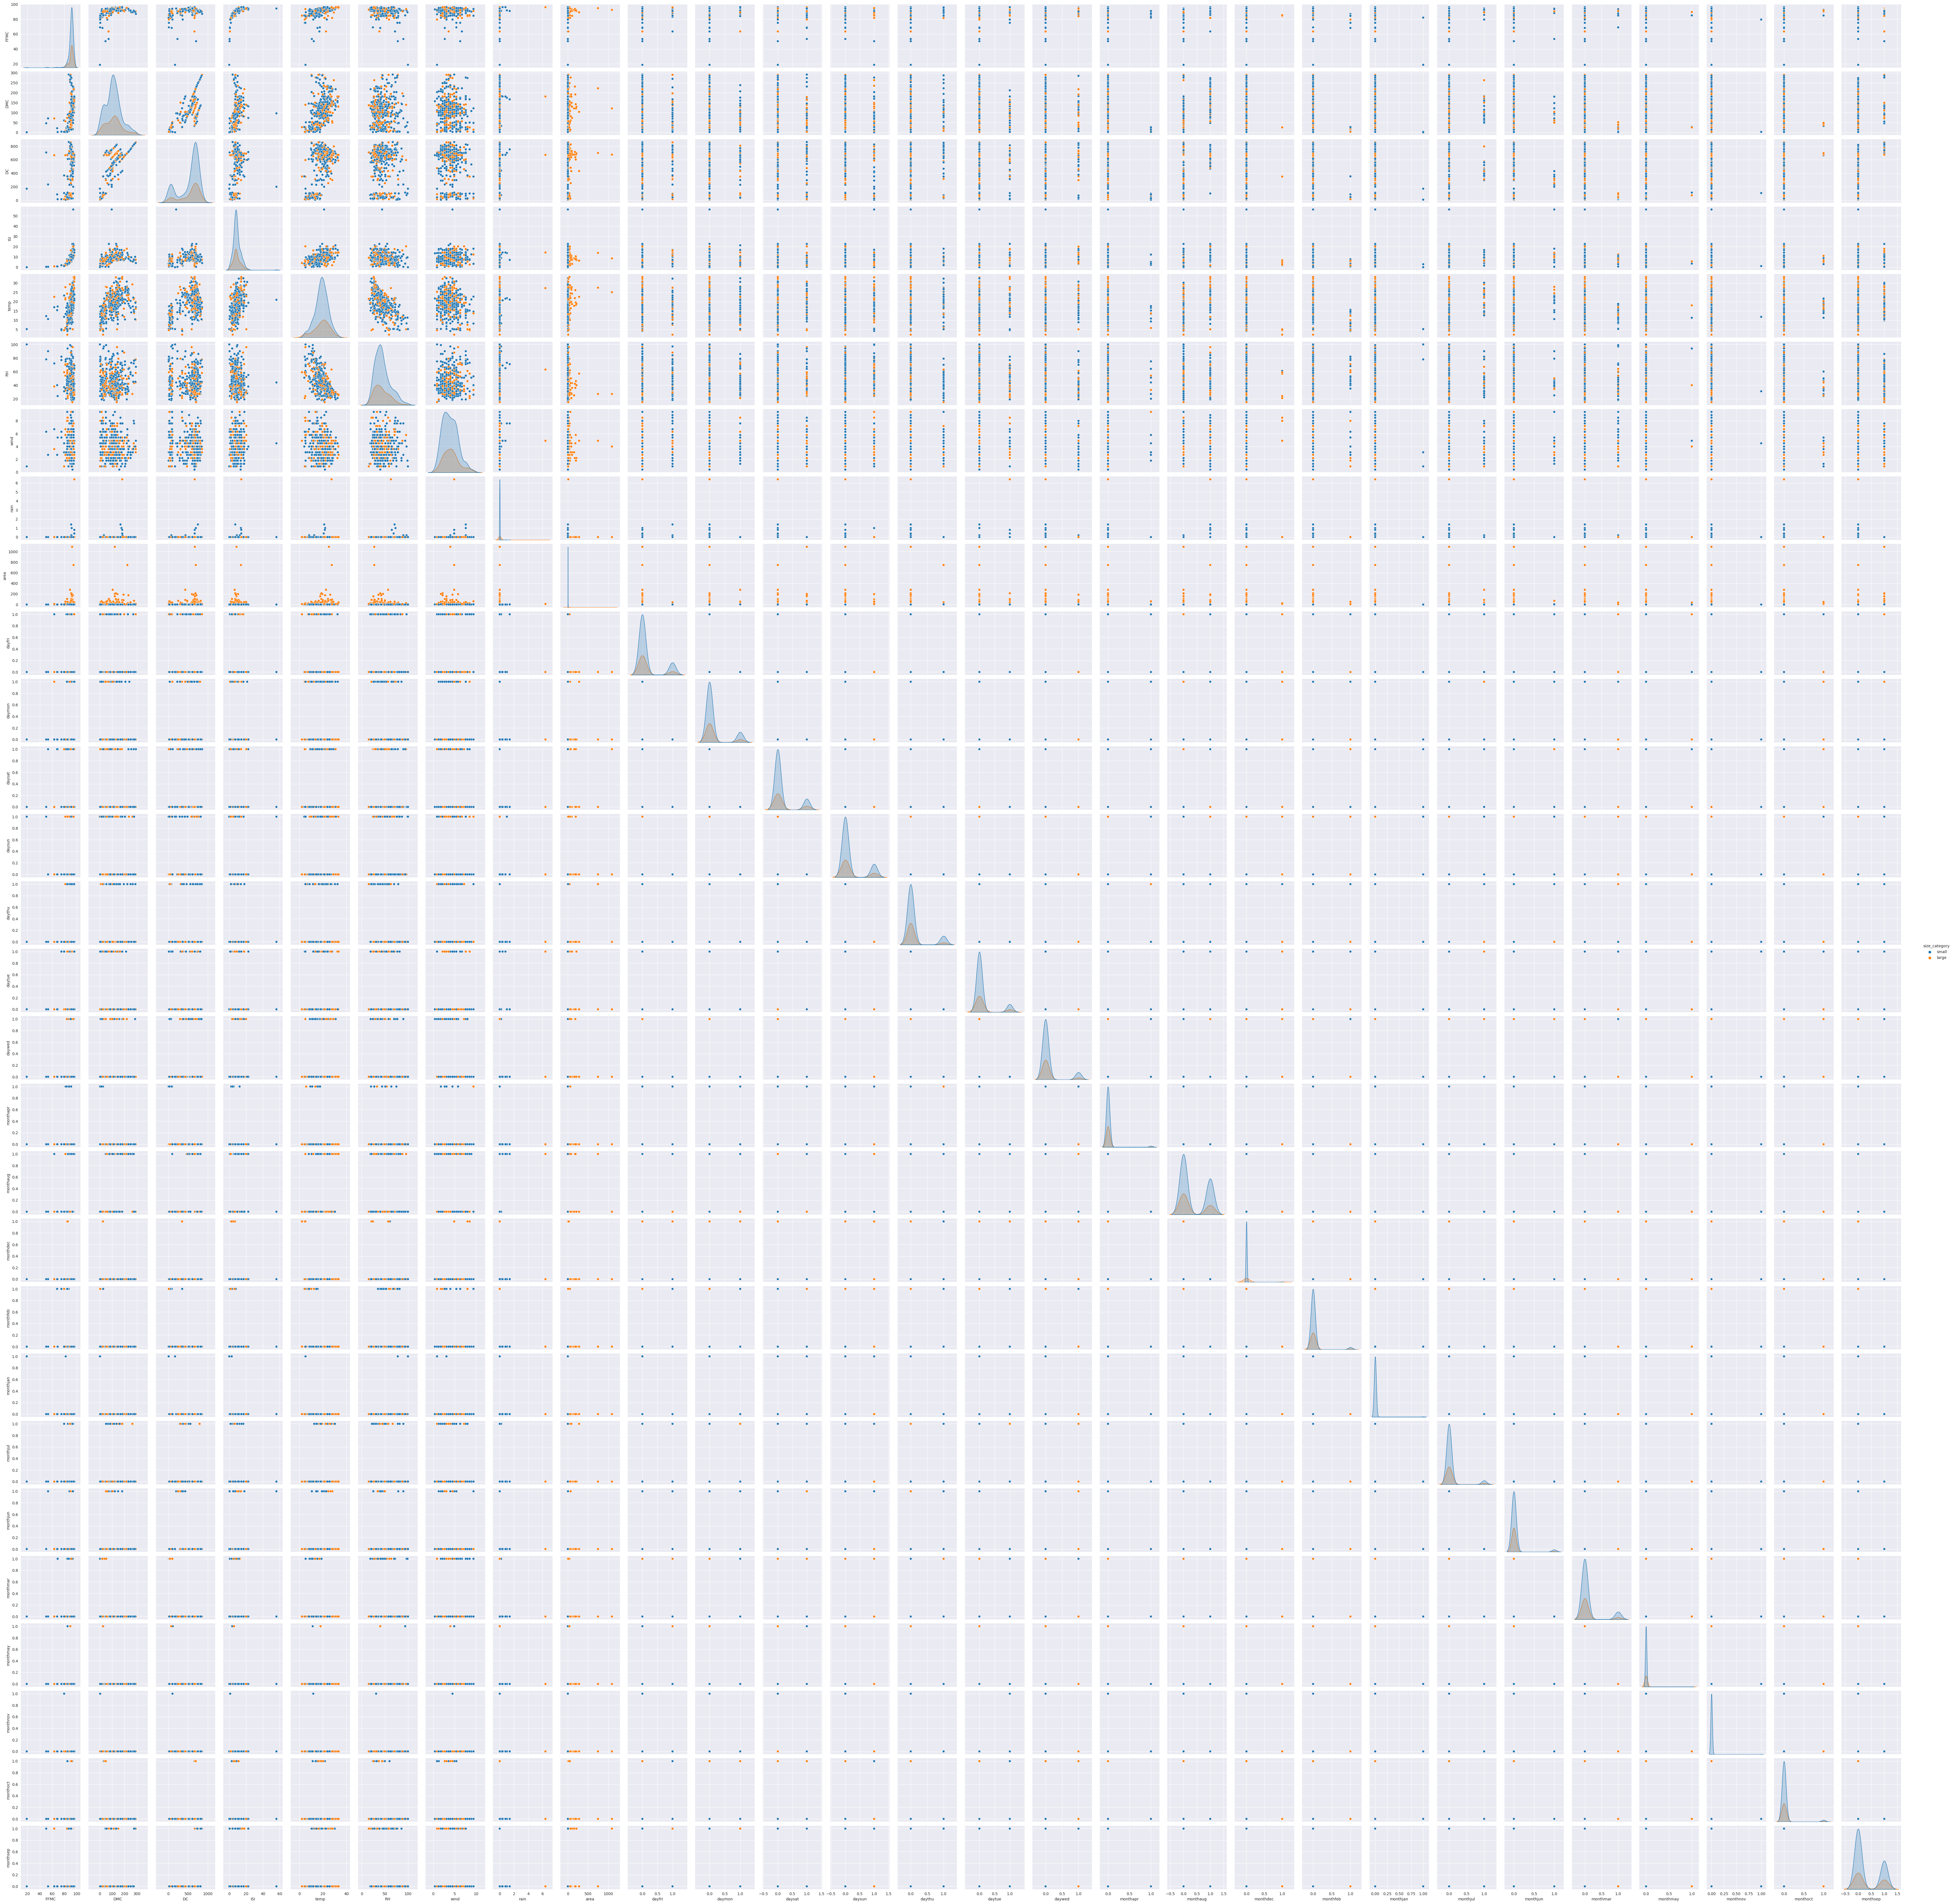

In [23]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='size_category')
plt.show()

**univariate plots**

<ipython-input-24-5b0d208495df>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




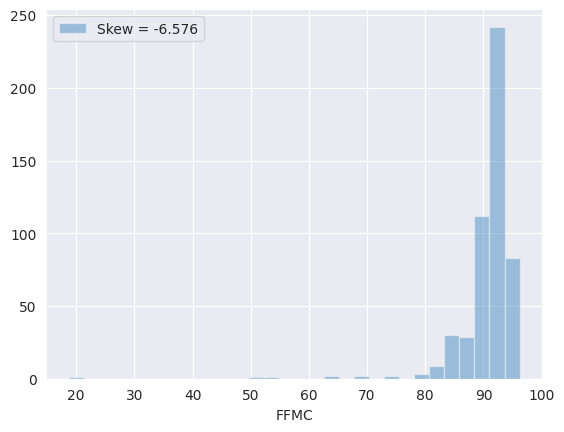

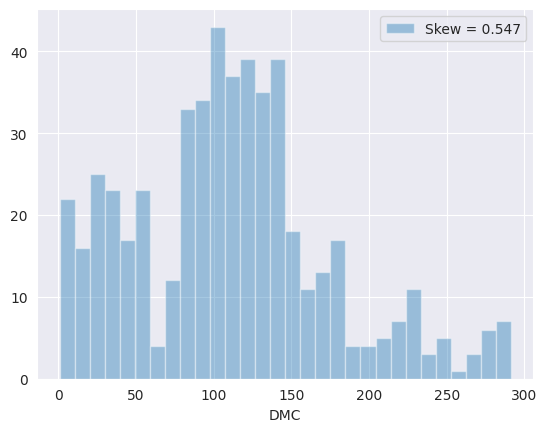

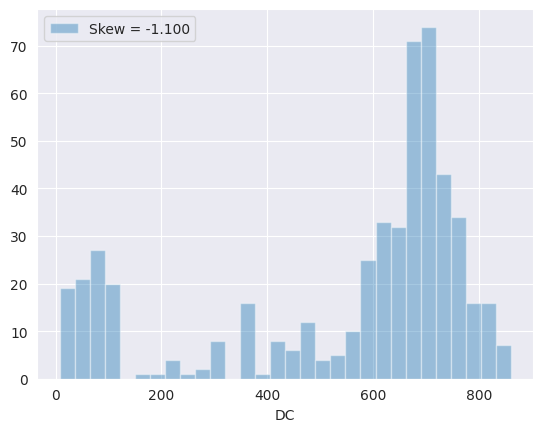

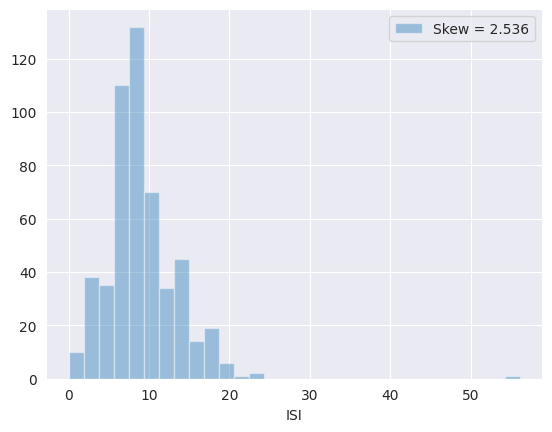

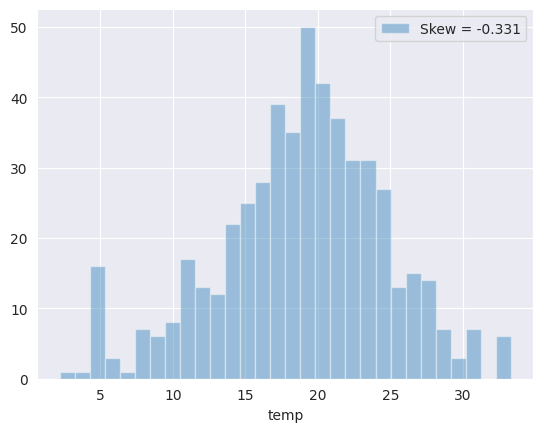

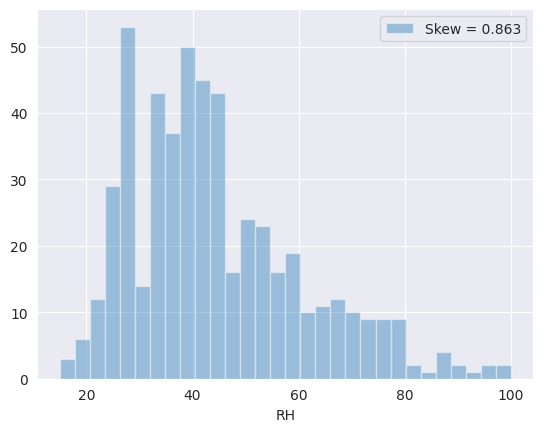

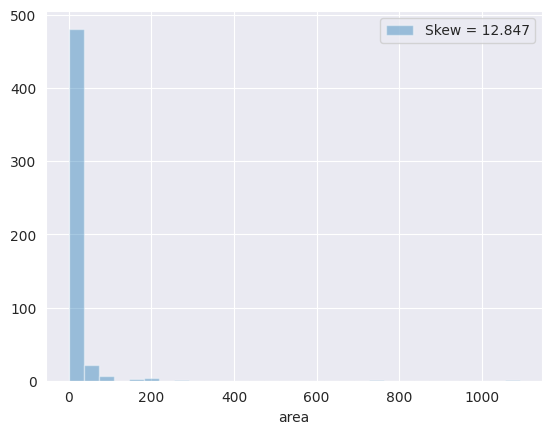

In [24]:
for feat in continuous_feature:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

**outlier detection**

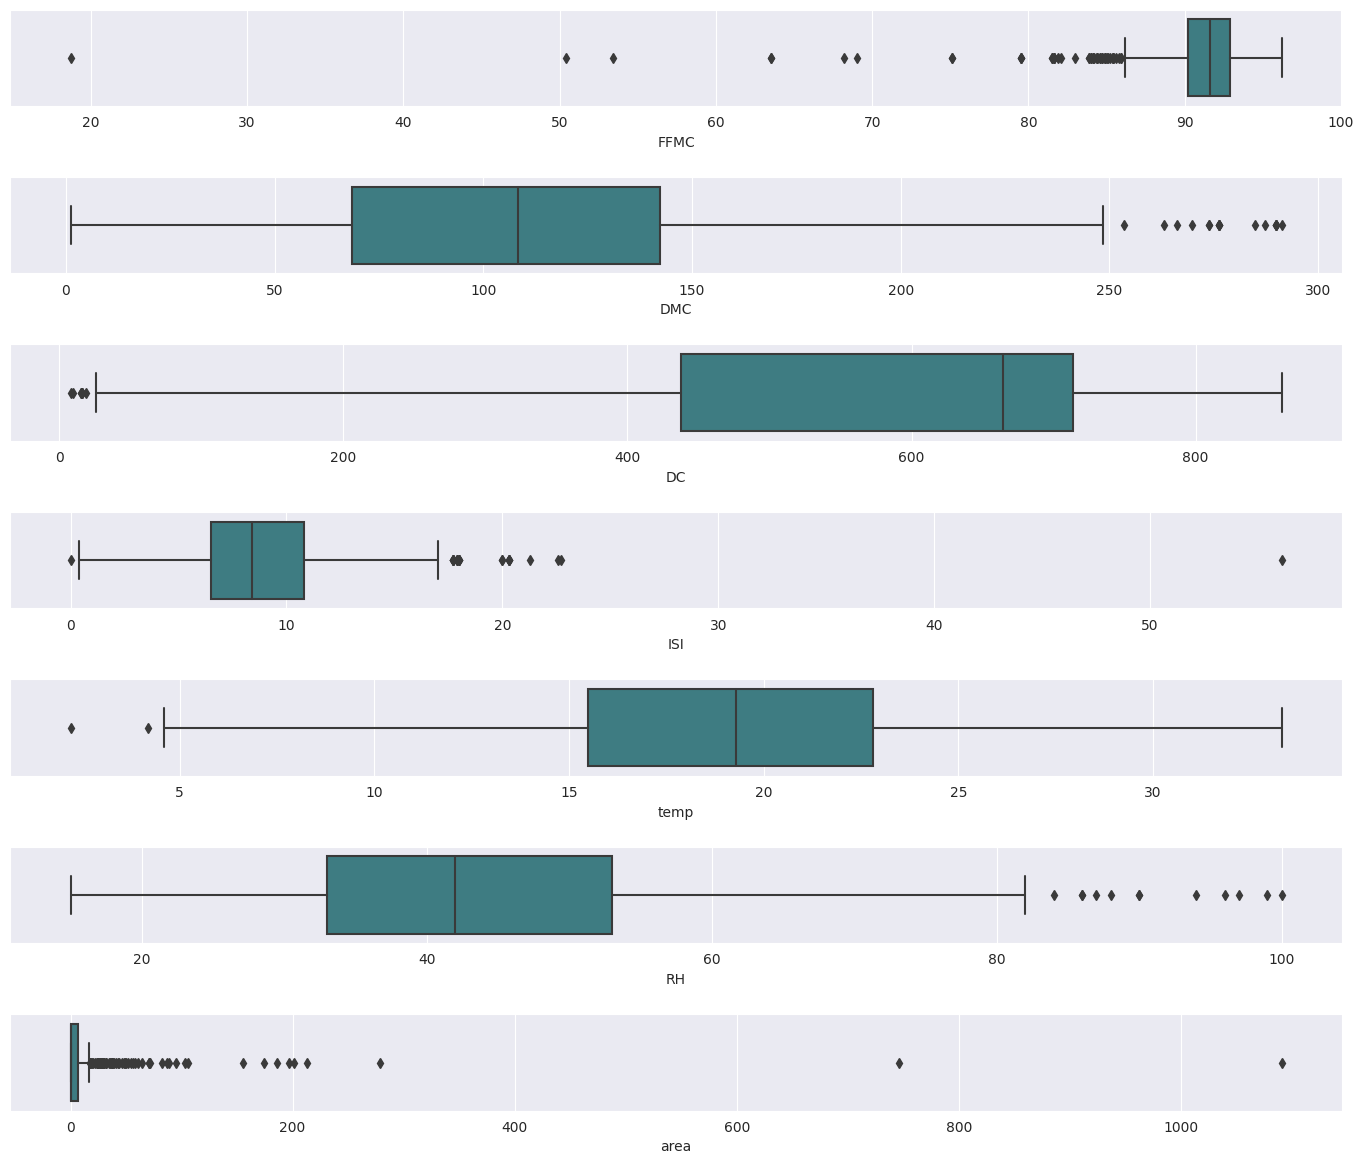

In [25]:
ot=df.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

**Visualize the distribution of 'Area' and taking insights**

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


<ipython-input-26-c8f1dcb7bd6a>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




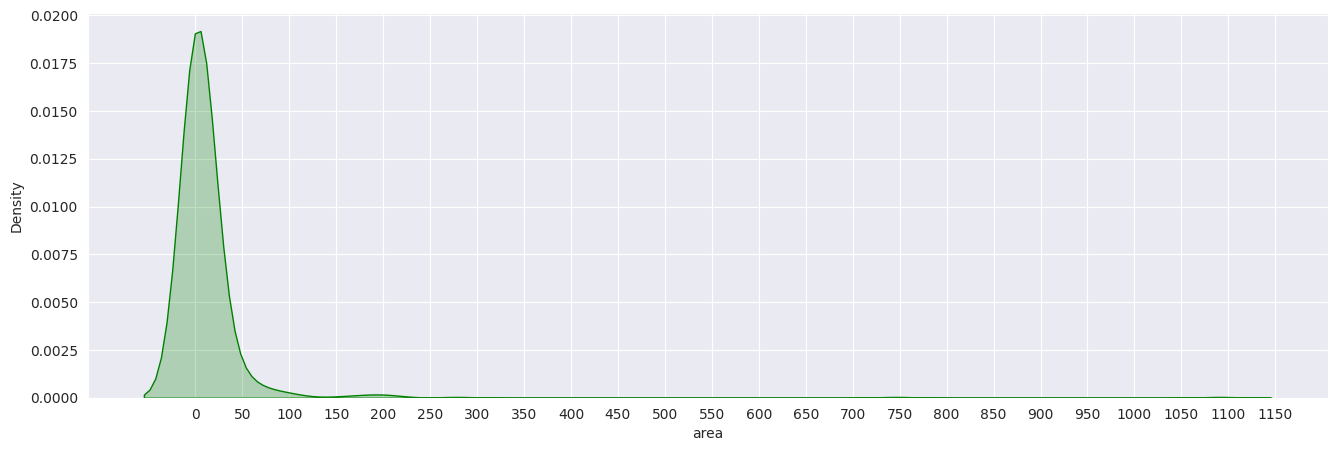

In [26]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()


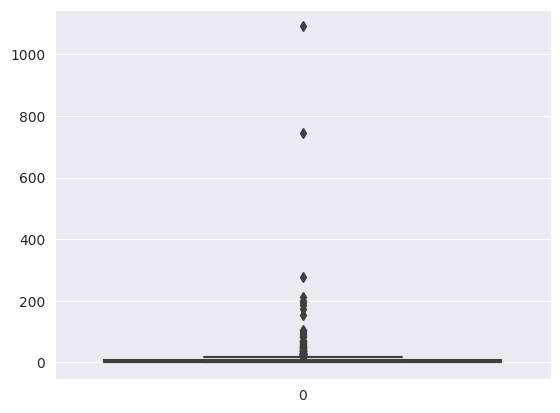

In [27]:

ax = sns.boxplot(df['area'])

**feature engineering**

In [28]:

continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 28


In [29]:
df[continuous_feature]

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 28 columns]

In [30]:
df_standard_scaled = df.copy()
features = df_standard_scaled[continuous_feature]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

month  day      FFMC       DMC        DC       ISI      temp        RH  \
0   mar  fri -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724   
1   oct  tue -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456   
2   oct  sat -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456   
3   mar  fri  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519   
4   mar  sun -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206   

       wind      rain  ...  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0  1.498614 -0.073268  ... -0.200603 -0.062318 -0.256865 -0.184391  2.928152   
1 -1.741756 -0.073268  ... -0.200603 -0.062318 -0.256865 -0.184391 -0.341512   
2 -1.518282 -0.073268  ... -0.200603 -0.062318 -0.256865 -0.184391 -0.341512   
3 -0.009834  0.603155  ... -0.200603 -0.062318 -0.256865 -0.184391  2.928152   
4 -1.238940 -0.073268  ... -0.200603 -0.062318 -0.256865 -0.184391  2.928152   

   monthmay  monthnov  monthoct  monthsep  size_category  
0 -0.062318 -0.044023 -0.172860 -0.706081          small  
1 -0.062318 -0.044023  5.785038 -0.706081          small  
2 -0.062318 -0.044023  5.785038 -0.706081          small  
3 -0.062318 -0.044023 -0.172860 -0.706081          small  
4 -0.062318 -0.044023 -0.172860 -0.706081          small  

[5 rows x 31 columns]

In [32]:
df1 = df_standard_scaled.copy()
df1.drop('size_category',axis=1, inplace =True)
df1 = pd.get_dummies(df1.iloc[:,:])
df1.head()

FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1 -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2 -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4 -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   

       rain     area    dayfri  ...  month_nov  month_oct  month_sep  day_fri  \
0 -0.073268 -0.20202  2.254407  ...          0          0          0        1   
1 -0.073268 -0.20202 -0.443576  ...          0          1          0        0   
2 -0.073268 -0.20202 -0.443576  ...          0          1          0        0   
3  0.603155 -0.20202  2.254407  ...          0          0          0        1   
4 -0.073268 -0.20202 -0.443576  ...          0          0          0        0   

   day_mon  day_sat  day_sun  day_thu  day_tue  day_wed  
0        0        0        0        0        0        0  
1        0        0        0        0        1        0  
2        0        1        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        1        0        0        0  

[5 rows x 47 columns]

Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing


In [33]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df1['size_category'] = df.size_category
df1['size_category'] = np.where(df1['size_category'].str.contains("large"), 1, 0)
df1.head()

FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1 -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2 -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4 -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   

       rain     area    dayfri  ...  month_oct  month_sep  day_fri  day_mon  \
0 -0.073268 -0.20202  2.254407  ...          0          0        1        0   
1 -0.073268 -0.20202 -0.443576  ...          1          0        0        0   
2 -0.073268 -0.20202 -0.443576  ...          1          0        0        0   
3  0.603155 -0.20202  2.254407  ...          0          0        1        0   
4 -0.073268 -0.20202 -0.443576  ...          0          0        0        0   

   day_sat  day_sun  day_thu  day_tue  day_wed  size_category  
0        0        0        0        0        0              0  
1        0        0        0        1        0              0  
2        1        0        0        0        0              0  
3        0        0        0        0        0              0  
4        0        1        0        0        0              0  

[5 rows x 48 columns]

In [34]:
df1.size_category.unique()

array([0, 1])

**Feature Selection Technique**

In [35]:
df.drop(['month','day','area'] ,axis=1, inplace= True)

In [36]:
data_ = df.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()


FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         1   
4         0         0         0         0         0         0         1   

   monthmay  monthnov  monthoct  
0         0         0         0  
1         0         0         1  
2         0         0         1  
3         0         0         0  
4         0         0         0  

[5 rows x 26 columns]

In [37]:
data_['size_category'] = df1.size_category
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  size_category  
0         0         0              0  
1         0         1              0  
2         0         1              0  
3         0         0              0  
4         0         0              0  

[5 rows x 27 columns]

In [38]:
le = LabelEncoder()
le.fit(data_["size_category"])
data_["size_category"]=le.transform(data_["size_category"])
data_.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  dayfri  daymon  ...  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0       1       0  ...   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0       0       0  ...   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0       0       0  ...   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2       1       0  ...   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0       0       0  ...   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  size_category  
0         0         0              0  
1         0         1              0  
2         0         1              0  
3         0         0              0  
4         0         0              0  

[5 rows x 27 columns]

In [39]:
# split into input (X) and output (y) variables
X = data_.drop('size_category', axis = 1)

Y =  data_.size_category

In [40]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2


In [41]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [42]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [43]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score   Feature
1   23.006108       DMC
2   21.872657        DC
17  17.601210  monthdec
5    6.350054        RH
7    5.216072      rain
6    1.440661      wind
16   1.157358  monthaug
12   0.964276    daythu
21   0.738170  monthjun
19   0.735450  monthjan
10   0.706636    daysat
13   0.620080    daytue
22   0.597478  monthmar
23   0.543575  monthmay
24   0.367725  monthnov
14   0.217190    daywed
8    0.205497    dayfri
11   0.113897    daysun
15   0.099580  monthapr
18   0.098668  monthfeb
3    0.090542       ISI
0    0.084434      FFMC
9    0.055135    daymon
4    0.033386      temp
20   0.024995  monthjul
25   0.000367  monthoct

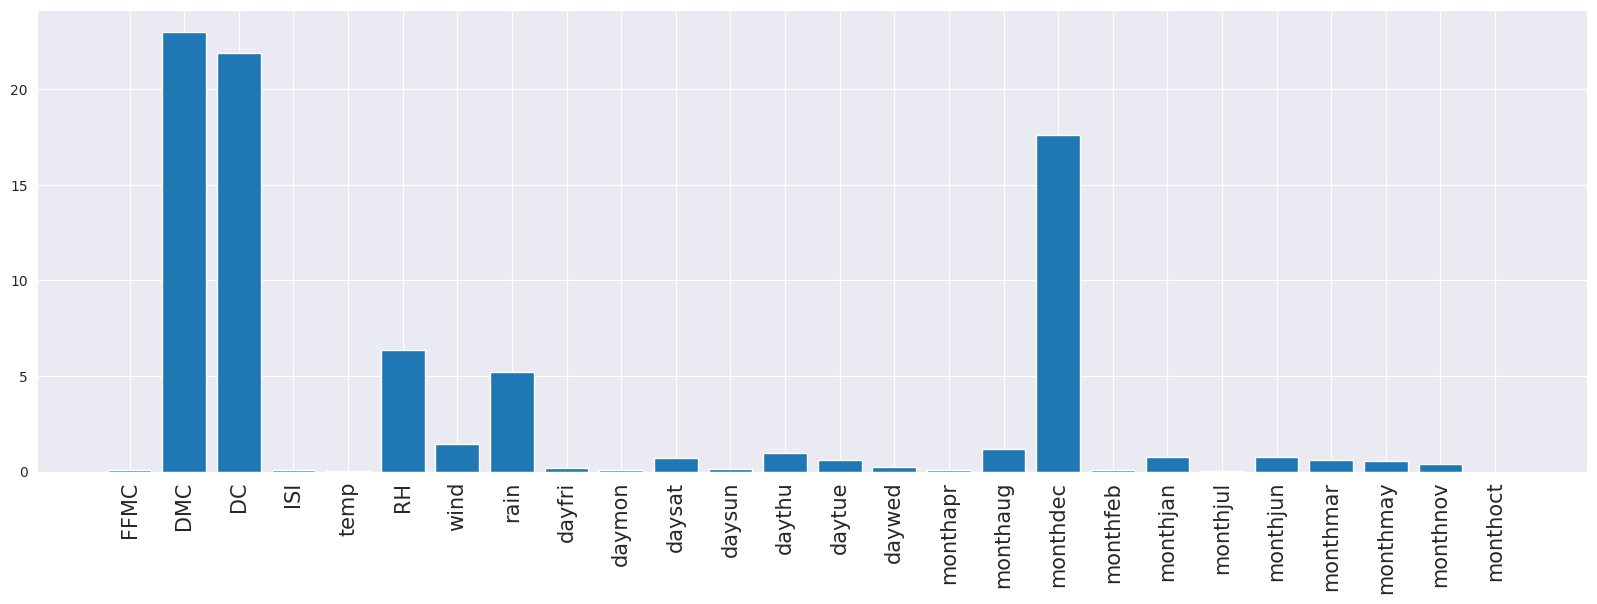

In [44]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

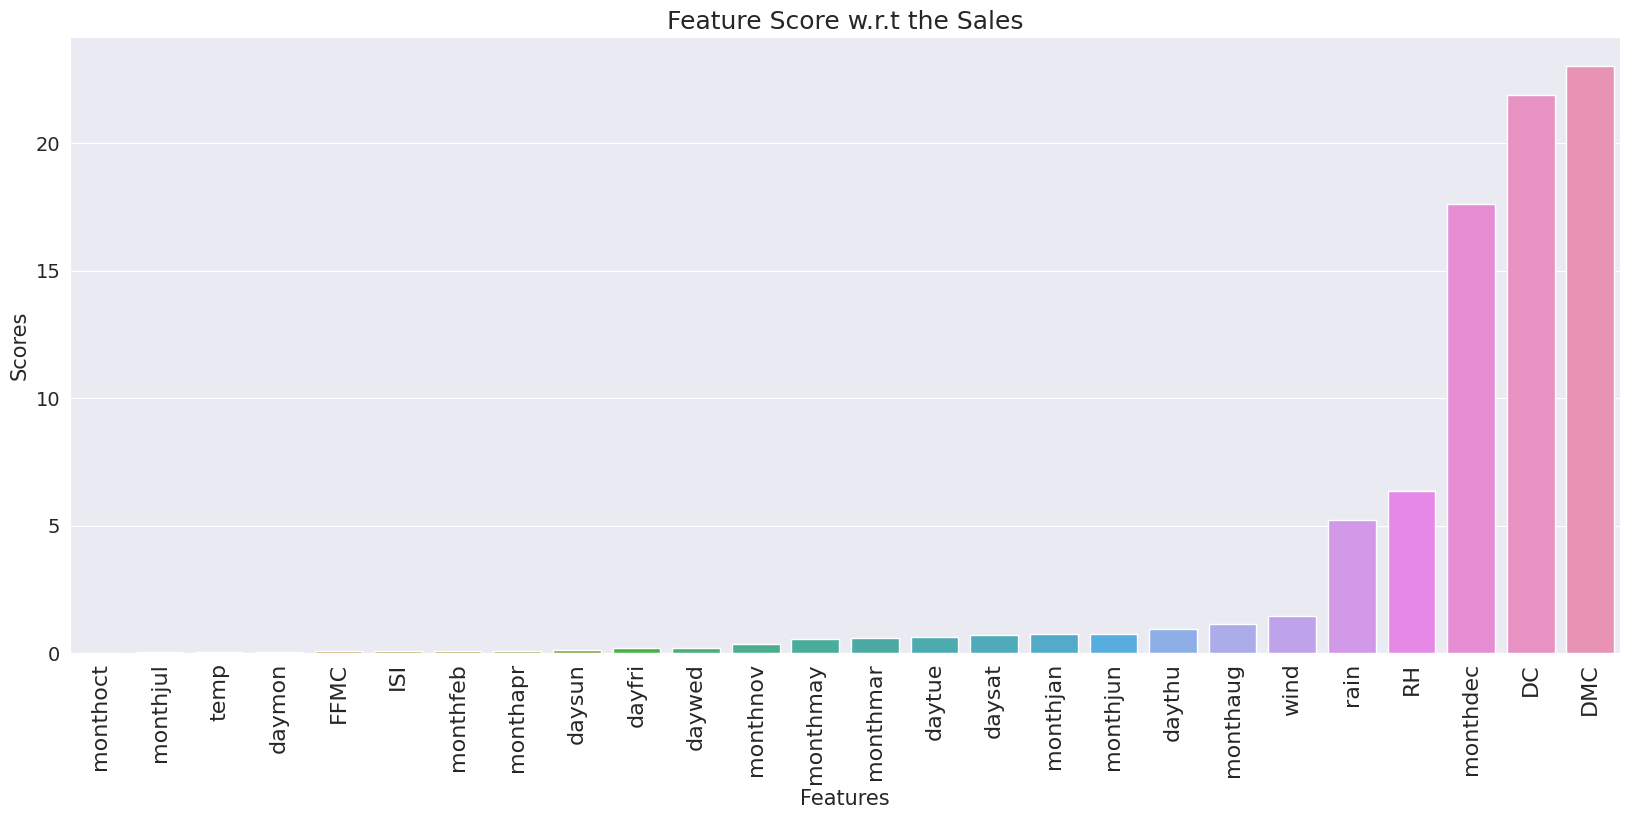

In [45]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [46]:
model_data=df1[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

DMC        DC        RH      rain      wind      area  month_apr  \
0   -1.323326 -1.830477  0.411724 -0.073268  1.498614 -0.202020          0   
1   -1.179541  0.488891 -0.692456 -0.073268 -1.741756 -0.202020          0   
2   -1.049822  0.560715 -0.692456 -0.073268 -1.518282 -0.202020          0   
3   -1.212361 -1.898266  3.233519  0.603155 -0.009834 -0.202020          0   
4   -0.931043 -1.798600  3.356206 -0.073268 -1.238940 -0.202020          0   
..        ...       ...       ...       ...       ...       ...        ...   
512 -0.846648  0.474768 -0.753800 -0.073268 -0.736124 -0.100753          0   
513 -0.846648  0.474768  1.638592 -0.073268  0.995798  0.651674          0   
514 -0.846648  0.474768  1.577248 -0.073268  1.498614 -0.026532          0   
515  0.549003  0.269382 -0.140366 -0.073268 -0.009834 -0.202020          0   
516 -1.685913 -1.780442 -0.815143 -0.073268  0.269509 -0.202020          0   

     month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
512          1          0          0          0          0          0   
513          1          0          0          0          0          0   
514          1          0          0          0          0          0   
515          1          0          0          0          0          0   
516          0          0          0          0          0          0   

     month_mar  month_may  month_nov  month_oct  month_sep  size_category  
0            1          0          0          0          0              0  
1            0          0          0          1          0              0  
2            0          0          0          1          0              0  
3            1          0          0          0          0              0  
4            1          0          0          0          0              0  
..         ...        ...        ...        ...        ...            ...  
512          0          0          0          0          0              1  
513          0          0          0          0          0              1  
514          0          0          0          0          0              1  
515          0          0          0          0          0              0  
516          0          0          1          0          0              0  

[517 rows x 19 columns]

Test Train Split With Imbalanced Dataset
**bold text**


In [47]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [48]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

In [49]:
len(x_train.columns)

18

**Hyperparameter Tuning**

In [50]:
!pip install tensorflow

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [52]:
X_train.shape

(413, 18)

In [53]:
len(df)


517

In [54]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [56]:
X_train.shape

(413, 18)

In [57]:
len(df)

517

In [58]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=18,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [59]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Fit the model
d = model.fit(X_train, Y_train, validation_split=0.2, epochs=70, batch_size=32)

# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/70
11/11 [==============================] - 1s 29ms/step - loss: 0.7111 - accuracy: 0.4394 - val_loss: 0.6989 - val_accuracy: 0.4940
Epoch 2/70
11/11 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.5576 - val_loss: 0.6687 - val_accuracy: 0.5181
Epoch 3/70
11/11 [==============================] - 0s 7ms/step - loss: 0.6433 - accuracy: 0.6455 - val_loss: 0.6425 - val_accuracy: 0.6627
Epoch 4/70
11/11 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.7182 - val_loss: 0.6211 - val_accuracy: 0.6988
Epoch 5/70
11/11 [==============================] - 0s 7ms/step - loss: 0.5942 - accuracy: 0.7515 - val_loss: 0.6054 - val_accuracy: 0.7470
Epoch 6/70
11/11 [==============================] - 0s 5ms/step - loss: 0.5771 - accuracy: 0.7636 - val_loss: 0.5922 - val_accuracy: 0.7711
Epoch 7/70
11/11 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7606 - val_loss: 0.5803 - val_accuracy: 0.7590
Epoch 8/70
11/11 [=

In [61]:
!pip install keras

In [62]:
!pip install scikeras

In [63]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.optimizers import Adam
#from keras.optimizers import adam_v2
#from tensorflow.keras.optimizers import Adam

In [64]:
#Hyperparameter tuning
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
X_standardized = a.fit_transform(x)

In [65]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model